In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_recall_fscore_support as prf1_score
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from collections import Counter

import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
# from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

In [3]:
import os

In [4]:
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

In [5]:
df = pd.read_csv(r'./covtype.csv')

In [6]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [8]:
unfilter = df.filter(regex='(^Soil|^Wild).+', axis='columns').columns

Numerical variable: Elevation


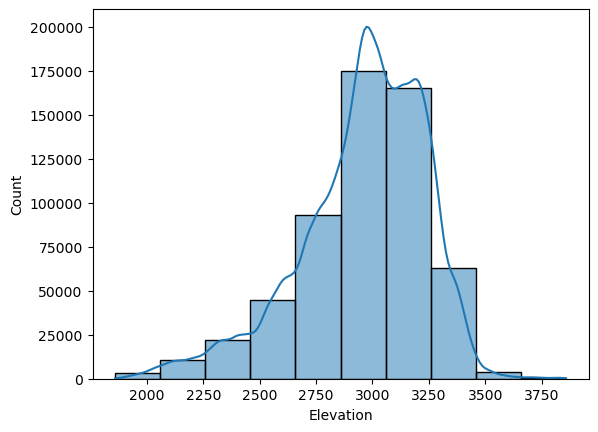

Numerical variable: Aspect


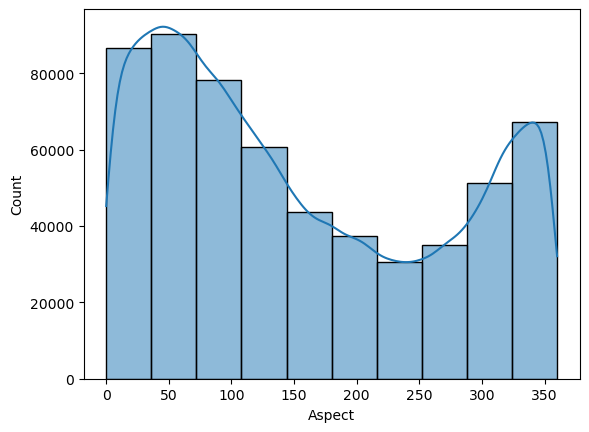

Numerical variable: Slope


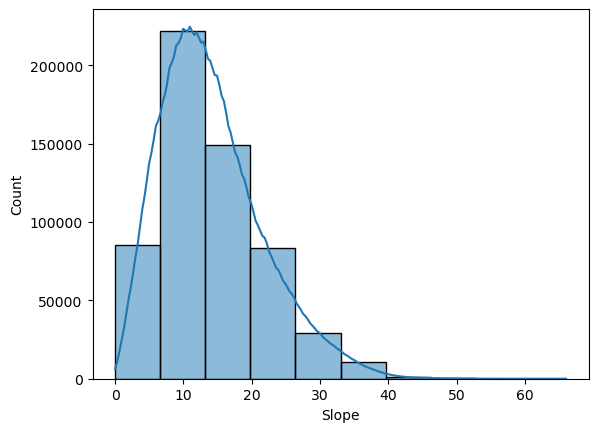

Numerical variable: Horizontal_Distance_To_Hydrology


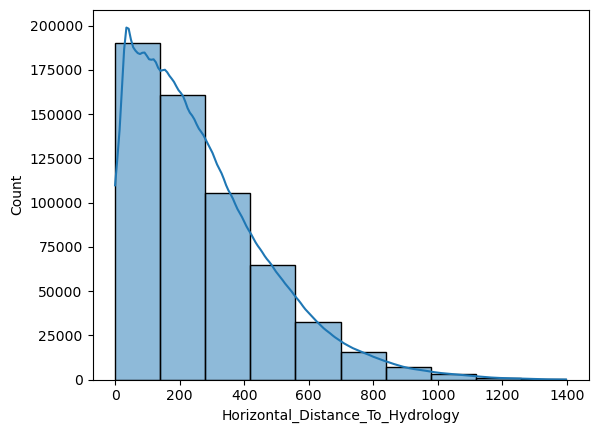

Numerical variable: Vertical_Distance_To_Hydrology


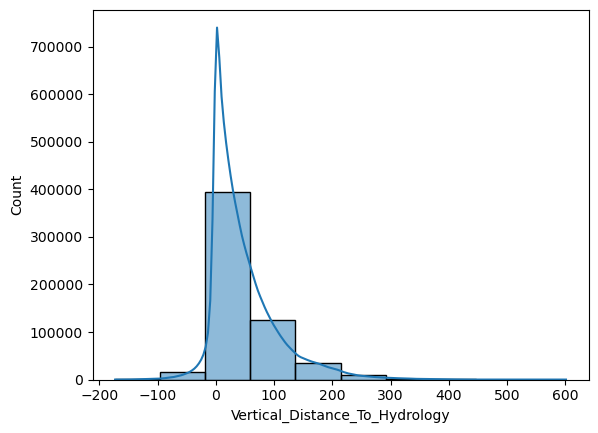

Numerical variable: Horizontal_Distance_To_Roadways


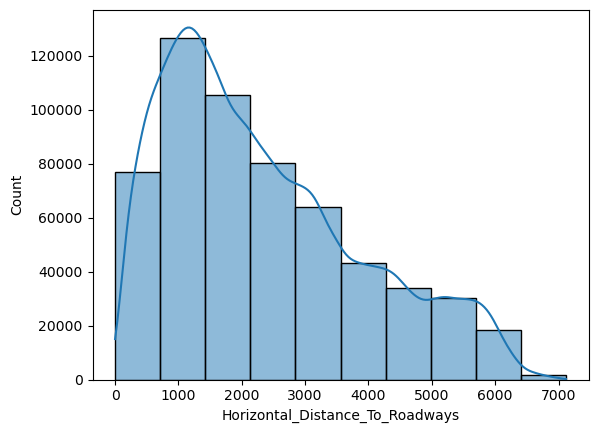

Numerical variable: Hillshade_9am


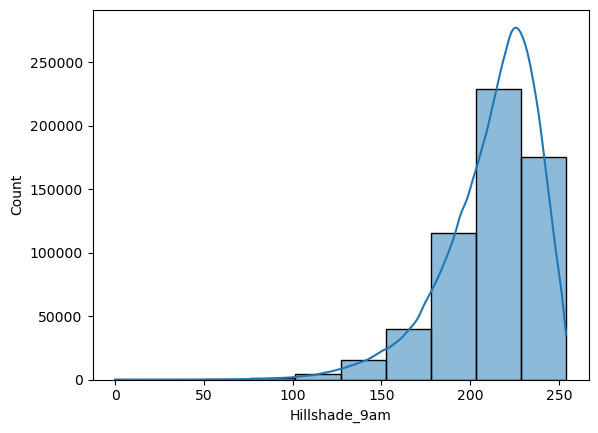

Numerical variable: Hillshade_Noon


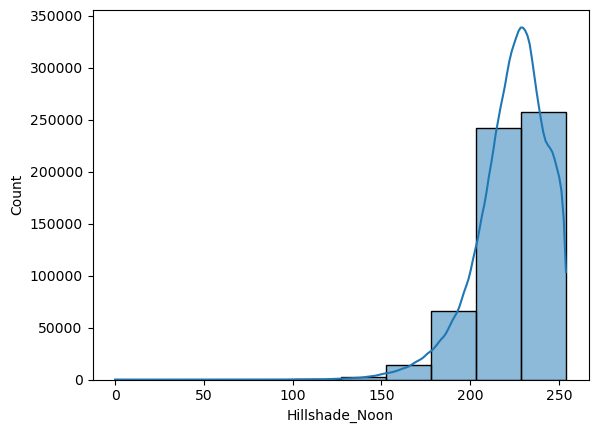

Numerical variable: Hillshade_3pm


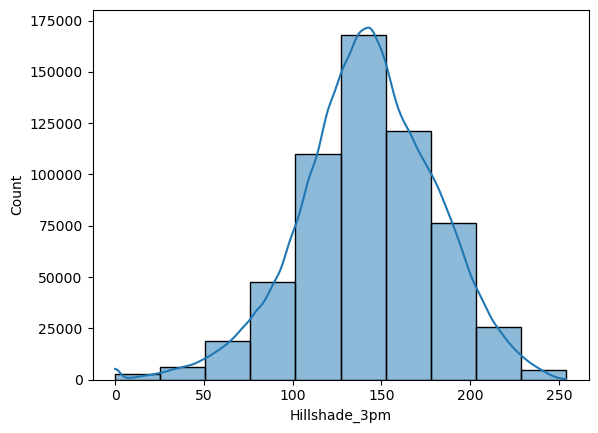

Numerical variable: Horizontal_Distance_To_Fire_Points


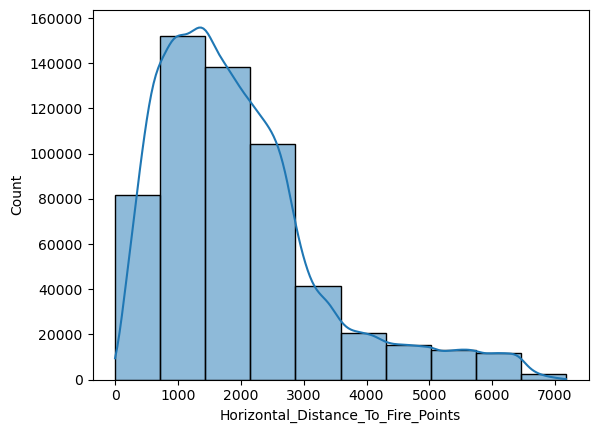

Numerical variable: Cover_Type


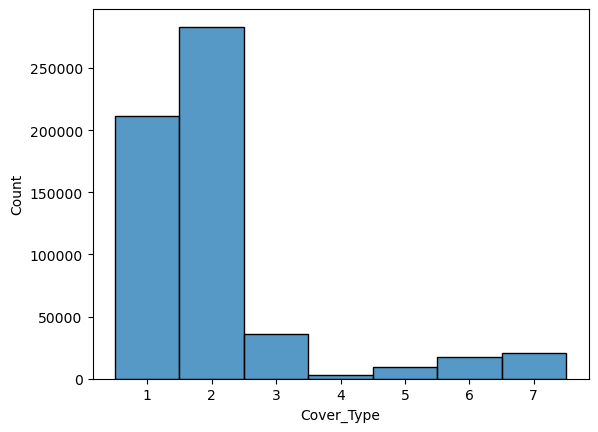

In [9]:
for name in df.drop(columns=unfilter).columns:
    tf_dis = (True if name=='Cover_Type' else False)
    tf_kde = (False if name=='Cover_Type' else True)
    print(f'Numerical variable: {name}')
    sns.histplot(df[name], kde=tf_kde, bins=10, discrete=tf_dis)
    plt.show()

Numerical variable: Elevation


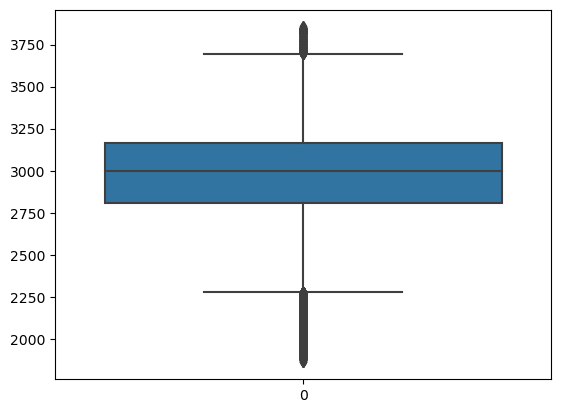

Numerical variable: Aspect


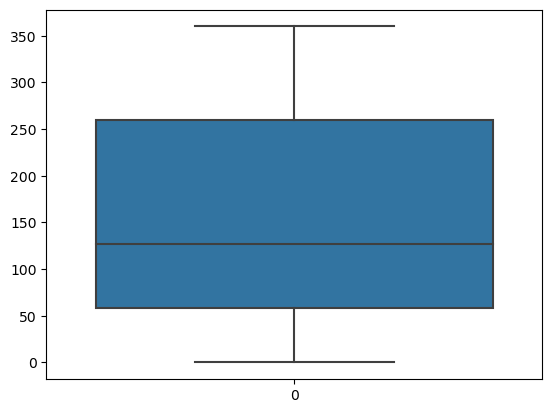

Numerical variable: Slope


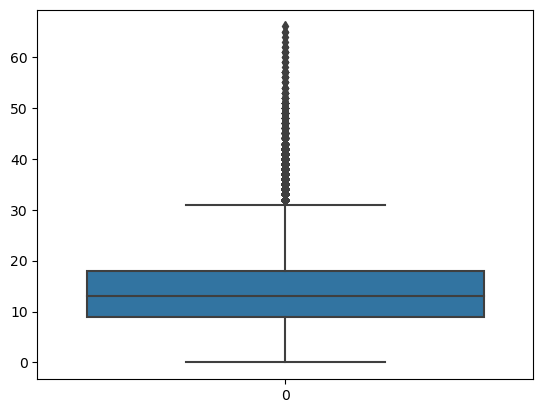

Numerical variable: Horizontal_Distance_To_Hydrology


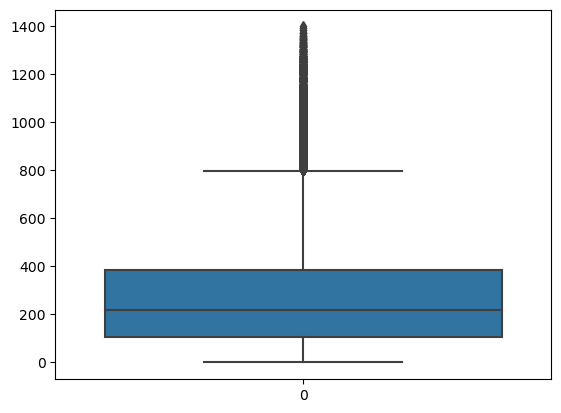

Numerical variable: Vertical_Distance_To_Hydrology


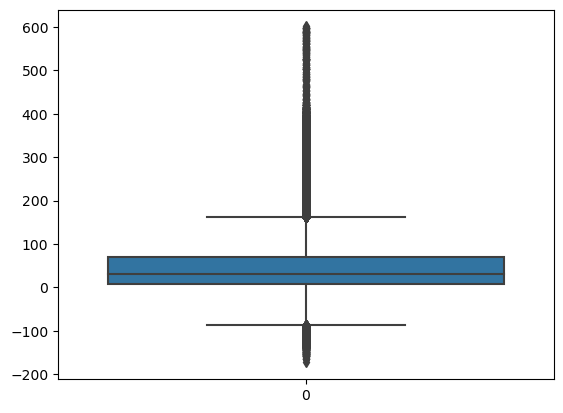

Numerical variable: Horizontal_Distance_To_Roadways


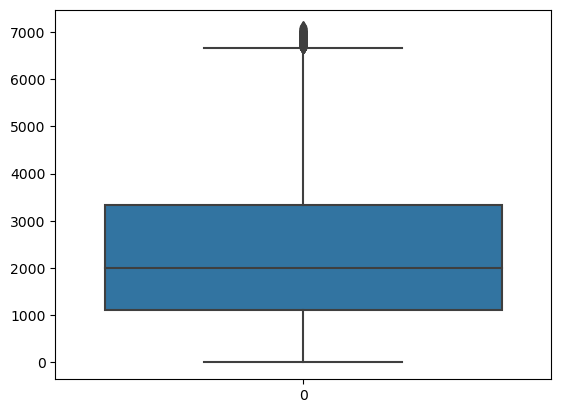

Numerical variable: Hillshade_9am


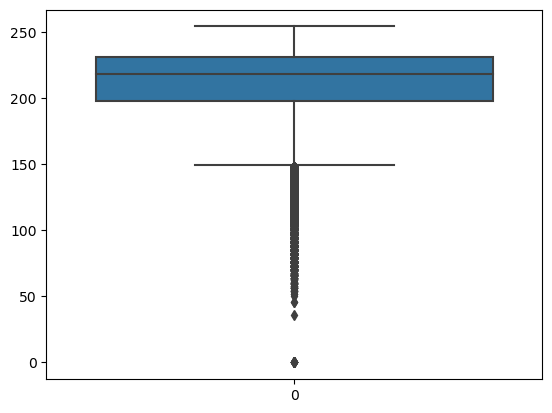

Numerical variable: Hillshade_Noon


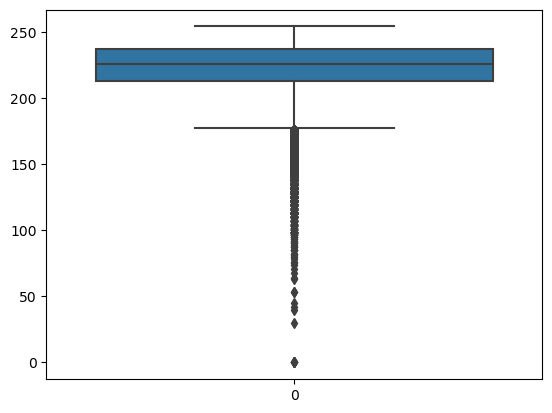

Numerical variable: Hillshade_3pm


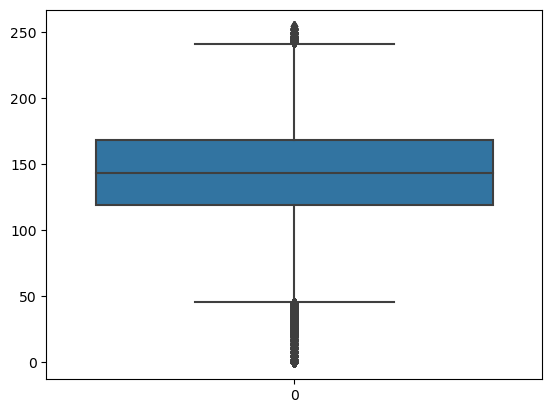

Numerical variable: Horizontal_Distance_To_Fire_Points


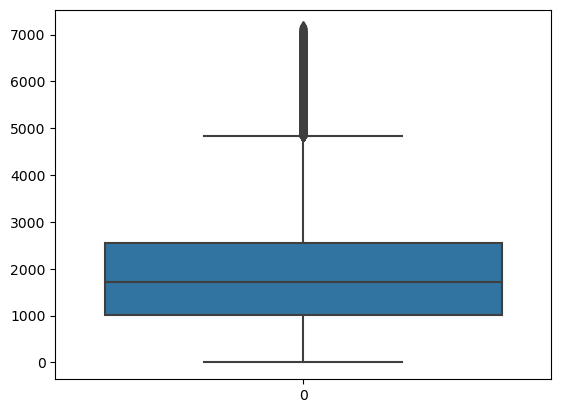

In [10]:
for name in df.drop(columns=list(unfilter)+['Cover_Type']).columns:
    print(f'Numerical variable: {name}')
    sns.boxplot(data=df[name])
    plt.show()

In [11]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [12]:
df[df['Vertical_Distance_To_Hydrology']<0]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
16,2610,259,1,120,-1,607,216,239,161,6096,...,0,0,0,0,0,0,0,0,0,5
26,2489,163,10,30,-4,849,230,243,145,5486,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580705,2707,95,8,595,-11,579,234,228,126,1500,...,0,0,0,0,0,0,0,0,0,3
580728,2505,239,27,480,-94,421,160,250,218,1087,...,0,0,0,0,0,0,0,0,0,3
580729,2518,243,31,474,-81,420,145,246,227,1075,...,0,0,0,0,0,0,0,0,0,3
580730,2538,250,40,458,-61,420,106,232,242,1064,...,0,0,0,0,0,0,0,0,0,3


In [13]:
df.duplicated().any()

False

In [14]:
any(df.isna().any())

False

In [15]:
corr_matrix = df.drop(columns=list(unfilter)+['Cover_Type']).corr()

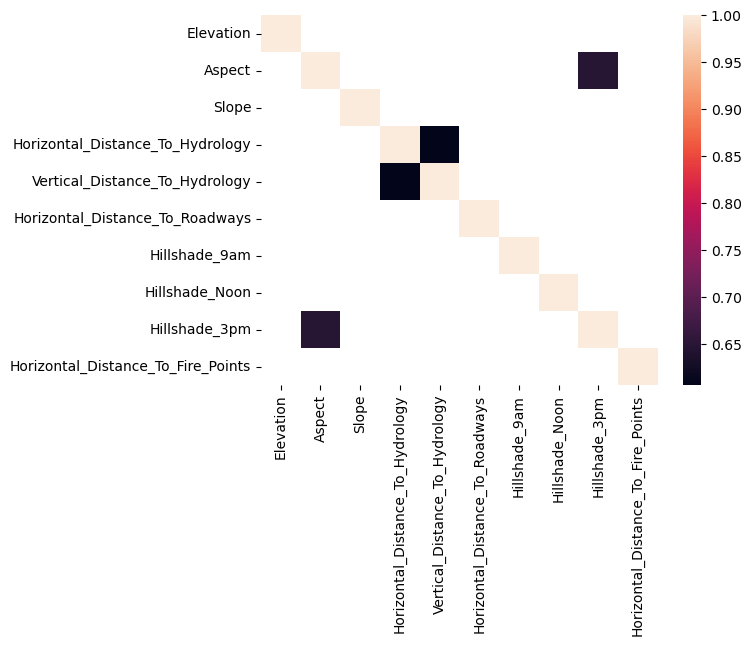

In [16]:
sns.heatmap(corr_matrix, mask=(corr_matrix<0.6))
plt.show()

In [17]:
X = df.iloc[:, :-1]        # Independent variables
y = df.iloc[:, -1]         # Dependent variable

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [19]:
y_train.value_counts()

2    226640
1    169472
3     28603
7     16408
6     13894
5      7594
4      2198
Name: Cover_Type, dtype: int64

In [20]:
cols_preproc = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

In [21]:
X_train_prep=X_train.copy()
X_test_prep=X_test.copy()

In [22]:
# scaler = StandardScaler()
# X_train_scaled[cols] = scaler.fit_transform(X_train[cols])
# X_test_scaled[cols] = scaler.transform(X_test[cols])

In [23]:
scaler_transf = ColumnTransformer(
    [
        ("scaler", StandardScaler(), cols_preproc)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
).set_output(transform="pandas")

# X_trained_prep = preprocessor.fit_transform(X_train)
# X_test_prep = preprocessor.transform(X_test)

In [24]:
cols_outl = ['Hillshade_9am', 'Hillshade_Noon']

In [25]:
def outlier_removal(X, factor, cols):
    X = pd.DataFrame(X).copy()
    out_indexes = []
    indexes = X.index.tolist()
    for col in X[cols].columns:
        x = pd.Series(X.loc[:,col]).copy()
        q1 = x.quantile(0.25)
        q3 = x.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (factor * iqr)
        upper_bound = q3 + (factor * iqr)
        out_index = X.loc[((X.loc[:,col] < lower_bound) | (X.loc[:,col] > upper_bound)),col].index.tolist()
        out_indexes.extend(out_index)
    to_keep_indexes = np.setdiff1d(indexes, out_indexes)
    return X.loc[to_keep_indexes]

def outlier_nan(X, factor, cols):
    X = pd.DataFrame(X).copy()
    for col in X[cols].columns:
        x = pd.Series(X.loc[:,col]).copy()
        q1 = x.quantile(0.25)
        q3 = x.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (factor * iqr)
        upper_bound = q3 + (factor * iqr)
        X.loc[((X.loc[:,col] < lower_bound) | (X.loc[:,col] > upper_bound)),col] = np.nan
    return X


#creating outlier_remover object using FunctionTransformer with factor=2.0
outlier_remover_transf = FunctionTransformer(outlier_removal,kw_args={'factor':4, 'cols':cols_outl})
outlier_nan_transf = FunctionTransformer(outlier_nan,kw_args={'factor':4, 'cols':cols_outl})

In [26]:
# X_trained_rem_outl = outlier_remover_transf.fit_transform(X_train)

In [27]:
# X_train.shape[0] - X_trained_rem_outl.shape[0]

In [28]:
# X_trained_na = outlier_nan_transf.fit_transform(X_train)

In [29]:
# X_trained_na[cols_outl].isnull().sum()

In [30]:
# data preprocessing
pipeline = Pipeline([('outlier_as_nan', outlier_nan_transf), 
                     ('fill_na', SimpleImputer(strategy='median')), 
                     ('scaler', scaler_transf), 
                     ]).set_output(transform="pandas")

C:\Users\pawel\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:334: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


In [31]:
X_train_prep = pipeline.fit_transform(X_train)

In [32]:
X_train_prep.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
107152,-1.172042,-0.461871,-1.348570,-1.267567,-0.795940,-0.989506,0.518775,0.541616,0.011890,-0.164574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
486925,1.170182,-0.435074,1.454901,0.890732,1.434043,-0.772757,1.530264,-1.138849,-2.130375,-0.664261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12620,-2.960844,-0.104576,-0.280581,-1.126502,-0.761633,-0.758008,0.930863,0.745308,-0.353862,-0.419701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149576,0.224009,-0.774503,-0.280581,0.622708,0.524896,1.215818,0.743550,-0.324078,-0.719615,-0.148723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512054,0.823847,-0.854895,-0.013584,-0.844371,-0.298483,-0.458535,0.668625,-0.731463,-0.902491,0.243026,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X_test_prep = pipeline.transform(X_test)
X_test_prep.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
41804,0.113325,-0.631586,-0.681077,1.097627,0.439127,1.779494,0.781013,0.083307,-0.484488,2.658432,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14445,1.430826,0.261651,-0.147082,1.393864,0.953739,1.358821,0.368925,1.305463,0.403768,0.439277,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194721,1.166611,1.753355,-0.814575,-0.844371,-0.693018,1.120911,-0.230477,0.134230,0.403768,-0.259681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317944,-0.350835,-0.470803,-0.147082,1.586654,-0.298483,-1.217798,1.118176,-0.069462,-0.902491,-0.610669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166561,-0.447238,-0.524397,-0.681077,-0.759732,-0.572942,-0.747107,0.893401,0.185154,-0.536738,-0.110982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# building base model
classifier = Sequential()
classifier.add(Dense(units=54, kernel_initializer='he_uniform', activation='relu', input_dim = 54))
classifier.add(Dense(units=50, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=35, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=8, activation='softmax'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 54)                2970      
                                                                 
 dense_1 (Dense)             (None, 50)                2750      
                                                                 
 dense_2 (Dense)             (None, 35)                1785      
                                                                 
 dense_3 (Dense)             (None, 8)                 288       
                                                                 
Total params: 7,793
Trainable params: 7,793
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_history = classifier.fit(X_train_prep, y_train, validation_split=0.33, batch_size=1000, epochs=100)

Epoch 1/100
312/312 [==============================] - 3s 7ms/step - loss: 0.7943 - accuracy: 0.6880 - val_loss: 0.6034 - val_accuracy: 0.7425
Epoch 2/100
312/312 [==============================] - 2s 6ms/step - loss: 0.5641 - accuracy: 0.7610 - val_loss: 0.5424 - val_accuracy: 0.7682
Epoch 3/100
312/312 [==============================] - 2s 5ms/step - loss: 0.5206 - accuracy: 0.7784 - val_loss: 0.5072 - val_accuracy: 0.7832
Epoch 4/100
312/312 [==============================] - 2s 6ms/step - loss: 0.4905 - accuracy: 0.7932 - val_loss: 0.4813 - val_accuracy: 0.7979
Epoch 5/100
312/312 [==============================] - 2s 6ms/step - loss: 0.4666 - accuracy: 0.8042 - val_loss: 0.4703 - val_accuracy: 0.7996
Epoch 6/100
312/312 [==============================] - 2s 5ms/step - loss: 0.4489 - accuracy: 0.8130 - val_loss: 0.4494 - val_accuracy: 0.8134
Epoch 7/100
312/312 [==============================] - 2s 6ms/step - loss: 0.4352 - accuracy: 0.8192 - val_loss: 0.4376 - val_accuracy: 0.8171

Epoch 58/100
312/312 [==============================] - 2s 5ms/step - loss: 0.2965 - accuracy: 0.8809 - val_loss: 0.3109 - val_accuracy: 0.8766
Epoch 59/100
312/312 [==============================] - 2s 5ms/step - loss: 0.2956 - accuracy: 0.8815 - val_loss: 0.3106 - val_accuracy: 0.8769
Epoch 60/100
312/312 [==============================] - 2s 5ms/step - loss: 0.2952 - accuracy: 0.8817 - val_loss: 0.3077 - val_accuracy: 0.8789
Epoch 61/100
312/312 [==============================] - 2s 5ms/step - loss: 0.2943 - accuracy: 0.8825 - val_loss: 0.3067 - val_accuracy: 0.8792
Epoch 62/100
312/312 [==============================] - 2s 5ms/step - loss: 0.2934 - accuracy: 0.8821 - val_loss: 0.3134 - val_accuracy: 0.8752
Epoch 63/100
312/312 [==============================] - 2s 5ms/step - loss: 0.2923 - accuracy: 0.8829 - val_loss: 0.3215 - val_accuracy: 0.8720
Epoch 64/100
312/312 [==============================] - 2s 5ms/step - loss: 0.2911 - accuracy: 0.8839 - val_loss: 0.3093 - val_accuracy:

In [37]:
score = classifier.evaluate(X_test_prep, y_test)
score

3632/3632 [==============================] - 6s 2ms/step - loss: 0.3034 - accuracy: 0.8798


[0.30336326360702515, 0.87979656457901]

In [38]:
y_pred = classifier.predict(X_test_prep)
y_pred = np.argmax(y_pred, axis=1)
y_pred

3632/3632 [==============================] - 5s 1ms/step


array([2, 1, 1, ..., 1, 2, 2], dtype=int64)

In [39]:
accuracy_score(y_pred, y_test)

0.8797965629114567

In [40]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.85      0.91      0.88     42368
           2       0.92      0.87      0.90     56661
           3       0.85      0.90      0.88      7151
           4       0.86      0.66      0.75       549
           5       0.75      0.62      0.68      1899
           6       0.76      0.75      0.75      3473
           7       0.93      0.84      0.88      4102

    accuracy                           0.88    116203
   macro avg       0.85      0.79      0.82    116203
weighted avg       0.88      0.88      0.88    116203



In [41]:
# data preprocessing
pipeline2 = Pipeline([('preprocessor', scaler_transf)]).set_output(transform="pandas")

In [42]:
X_train_prep2 = pipeline2.fit_transform(X_train)

In [43]:
X_train_prep2.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
107152,-1.172042,-0.461871,-1.348570,-1.267567,-0.795940,-0.989506,0.518351,0.539973,0.011890,-0.164574,...,0,0,0,0,0,0,0,0,0,0
486925,1.170182,-0.435074,1.454901,0.890732,1.434043,-0.772757,1.527549,-1.128081,-2.130375,-0.664261,...,0,0,0,0,0,0,0,0,0,1
12620,-2.960844,-0.104576,-0.280581,-1.126502,-0.761633,-0.758008,0.929506,0.742162,-0.353862,-0.419701,...,0,0,0,0,0,0,0,0,0,0
149576,0.224009,-0.774503,-0.280581,0.622708,0.524896,1.215818,0.742617,-0.319327,-0.719615,-0.148723,...,0,0,0,0,0,0,0,0,0,0
512054,0.823847,-0.854895,-0.013584,-0.844371,-0.298483,-0.458535,0.667862,-0.723704,-0.902491,0.243026,...,0,0,1,0,0,0,0,0,0,0


In [44]:
X_test_prep2 = pipeline2.transform(X_test)
X_test_prep2.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
41804,0.113325,-0.631586,-0.681077,1.097627,0.439127,1.779494,0.779995,0.085050,-0.484488,2.658432,...,0,0,0,0,0,0,0,0,0,0
14445,1.430826,0.261651,-0.147082,1.393864,0.953739,1.358821,0.368840,1.298180,0.403768,0.439277,...,0,0,1,0,0,0,0,0,0,0
194721,1.166611,1.753355,-0.814575,-0.844371,-0.693018,1.120911,-0.229204,0.135597,0.403768,-0.259681,...,0,0,0,0,0,0,0,0,0,0
317944,-0.350835,-0.470803,-0.147082,1.586654,-0.298483,-1.217798,1.116394,-0.066592,-0.902491,-0.610669,...,0,0,0,0,0,0,0,0,0,0
166561,-0.447238,-0.524397,-0.681077,-0.759732,-0.572942,-0.747107,0.892128,0.186144,-0.536738,-0.110982,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# building base model
classifier2 = Sequential()
classifier2.add(Dense(units=54, kernel_initializer='he_uniform', activation='relu', input_dim = 54))
classifier2.add(Dense(units=50, kernel_initializer='he_uniform', activation='relu'))
classifier2.add(Dense(units=35, kernel_initializer='he_uniform', activation='relu'))
classifier2.add(Dense(units=8, activation='softmax'))

# Compiling the ANN
classifier2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
model_history2 = classifier2.fit(X_train_prep2, y_train, validation_split=0.33, batch_size=1000, epochs=100)

Epoch 1/100
312/312 [==============================] - 3s 8ms/step - loss: 0.7788 - accuracy: 0.6906 - val_loss: 0.5983 - val_accuracy: 0.7440
Epoch 2/100
312/312 [==============================] - 2s 6ms/step - loss: 0.5626 - accuracy: 0.7596 - val_loss: 0.5419 - val_accuracy: 0.7650
Epoch 3/100
312/312 [==============================] - 2s 6ms/step - loss: 0.5213 - accuracy: 0.7752 - val_loss: 0.5096 - val_accuracy: 0.7785
Epoch 4/100
312/312 [==============================] - 2s 6ms/step - loss: 0.4915 - accuracy: 0.7884 - val_loss: 0.4837 - val_accuracy: 0.7916
Epoch 5/100
312/312 [==============================] - 2s 6ms/step - loss: 0.4689 - accuracy: 0.7990 - val_loss: 0.4754 - val_accuracy: 0.7917
Epoch 6/100
312/312 [==============================] - 2s 6ms/step - loss: 0.4515 - accuracy: 0.8077 - val_loss: 0.4508 - val_accuracy: 0.8078
Epoch 7/100
312/312 [==============================] - 2s 6ms/step - loss: 0.4381 - accuracy: 0.8145 - val_loss: 0.4404 - val_accuracy: 0.8145

Epoch 58/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2967 - accuracy: 0.8793 - val_loss: 0.3108 - val_accuracy: 0.8759
Epoch 59/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2967 - accuracy: 0.8792 - val_loss: 0.3152 - val_accuracy: 0.8743
Epoch 60/100
312/312 [==============================] - 2s 5ms/step - loss: 0.2961 - accuracy: 0.8797 - val_loss: 0.3091 - val_accuracy: 0.8762
Epoch 61/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2945 - accuracy: 0.8803 - val_loss: 0.3052 - val_accuracy: 0.8785
Epoch 62/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2930 - accuracy: 0.8810 - val_loss: 0.3121 - val_accuracy: 0.8741
Epoch 63/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2923 - accuracy: 0.8816 - val_loss: 0.3095 - val_accuracy: 0.8766
Epoch 64/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2909 - accuracy: 0.8815 - val_loss: 0.3040 - val_accuracy:

In [48]:
score2 = classifier.evaluate(X_test_prep2, y_test)
score2

3632/3632 [==============================] - 7s 2ms/step - loss: 0.3035 - accuracy: 0.8798


[0.30348432064056396, 0.8797535300254822]

In [49]:
y_pred2 = classifier.predict(X_test_prep2)
y_pred2 = np.argmax(y_pred2, axis=1)
y_pred2

3632/3632 [==============================] - 6s 1ms/step


array([2, 1, 1, ..., 1, 2, 2], dtype=int64)

In [50]:
accuracy_score(y_pred2, y_test)

0.8797535347624416

In [51]:
# Classification Report

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.85      0.91      0.88     42368
           2       0.92      0.87      0.90     56661
           3       0.85      0.90      0.87      7151
           4       0.86      0.66      0.74       549
           5       0.76      0.62      0.68      1899
           6       0.76      0.75      0.75      3473
           7       0.93      0.84      0.88      4102

    accuracy                           0.88    116203
   macro avg       0.85      0.79      0.82    116203
weighted avg       0.88      0.88      0.88    116203



In [52]:
cr1 = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T
cr2 = pd.DataFrame(classification_report(y_test, y_pred2, output_dict=True)).T

In [53]:
# scaling only gave same results
cr2 - cr1

,precision,recall,f1-score,support
1,0.000078,-0.000236,-0.000067,0.000000
2,-0.000178,0.000106,-0.000029,0.000000
3,-0.000533,-0.000559,-0.000546,0.000000
4,-0.000338,-0.001821,-0.001293,0.000000
5,0.000646,0.000527,0.000580,0.000000
6,0.000815,-0.000288,0.000255,0.000000
7,-0.000171,0.000975,0.000457,0.000000
accuracy,-0.000043,-0.000043,-0.000043,-0.000043
macro avg,0.000046,-0.000185,-0.000092,0.000000
weighted avg,-0.000064,-0.000043,-0.000045,0.000000


In [54]:
precision, recall, fscore, support = prf1_score(y_test, y_pred2)

scores_df = pd.DataFrame({'precision': precision, 'recall': recall, 'f1score':fscore}, 
                         index=sorted(list(y_test.unique())))

In [55]:
scores_df.style.format("{:.2%}")

,precision,recall,f1score
1,84.87%,91.35%,87.99%
2,91.77%,87.43%,89.55%
3,85.41%,89.61%,87.46%
4,85.75%,65.76%,74.43%
5,75.53%,61.61%,67.87%
6,75.76%,74.52%,75.13%
7,92.77%,84.40%,88.38%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


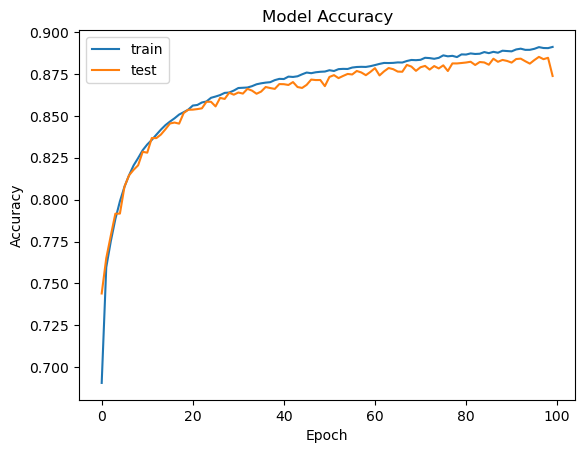

In [56]:
# List all data in history
print(model_history2.history.keys())

# Summarize history for accuracy
plt.plot(model_history2.history['accuracy'])
plt.plot(model_history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

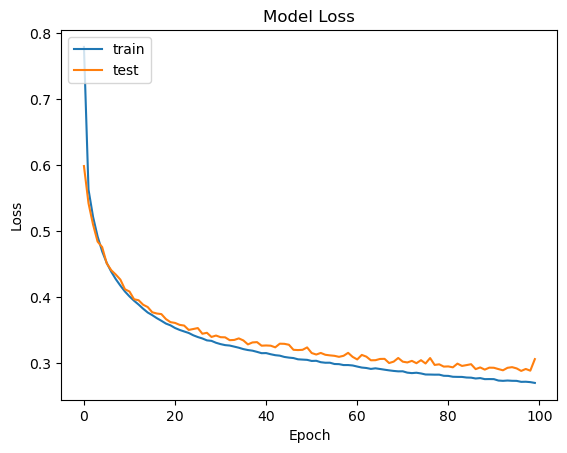

In [57]:
# Summarize history for loss

plt.plot(model_history2.history['loss'])
plt.plot(model_history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [58]:
cm = confusion_matrix(y_pred, y_test)
cm_norm = confusion_matrix(y_pred, y_test, normalize='all')

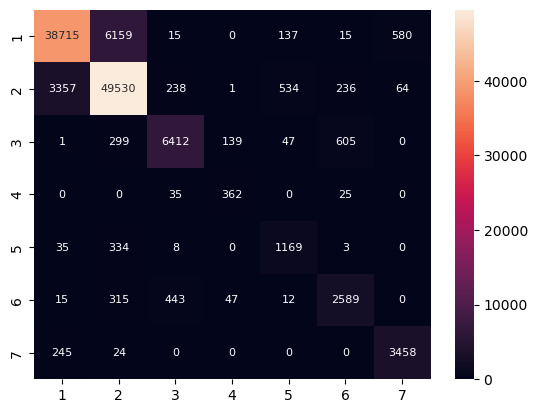

In [59]:
ax = plt.subplot()
cm_heatmap = sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size":8}, ax=ax)
cm_heatmap.set_xticklabels(range(1,8))
cm_heatmap.set_yticklabels(range(1,8))
plt.show()

In [60]:
# check with class weights

In [61]:
from sklearn.utils import class_weight

In [62]:
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train)

In [63]:
class_weights_dict = dict(enumerate(class_weights))

In [64]:
class_weights_dict

{0: 0.39181272253992233,
 1: 0.29298131712974634,
 2: 2.3214797648598298,
 3: 30.209866112049916,
 4: 8.743914368486399,
 5: 4.779133850171708,
 6: 4.046884794873581}

In [65]:
# building base model
classifier3 = Sequential()
classifier3.add(Dense(units=54, kernel_initializer='he_uniform', activation='relu', input_dim = 54))
classifier3.add(Dense(units=50, kernel_initializer='he_uniform', activation='relu'))
classifier3.add(Dense(units=35, kernel_initializer='he_uniform', activation='relu'))
classifier3.add(Dense(units=8, activation='softmax'))

# Compiling the ANN
classifier3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [66]:
# y values need to start from 0
model_history3 = classifier3.fit(X_train_prep2, y_train-1, validation_split=0.33, 
                                 batch_size=1000, epochs=100, class_weight=class_weights_dict)

Epoch 1/100
312/312 [==============================] - 3s 7ms/step - loss: 0.9421 - accuracy: 0.5007 - val_loss: 0.9183 - val_accuracy: 0.5843
Epoch 2/100
312/312 [==============================] - 2s 6ms/step - loss: 0.6075 - accuracy: 0.6286 - val_loss: 0.8293 - val_accuracy: 0.6285
Epoch 3/100
312/312 [==============================] - 2s 6ms/step - loss: 0.5580 - accuracy: 0.6526 - val_loss: 0.7487 - val_accuracy: 0.6682
Epoch 4/100
312/312 [==============================] - 2s 7ms/step - loss: 0.5276 - accuracy: 0.6673 - val_loss: 0.7352 - val_accuracy: 0.6734
Epoch 5/100
312/312 [==============================] - 2s 7ms/step - loss: 0.5067 - accuracy: 0.6780 - val_loss: 0.7131 - val_accuracy: 0.6812
Epoch 6/100
312/312 [==============================] - 2s 6ms/step - loss: 0.4880 - accuracy: 0.6865 - val_loss: 0.7242 - val_accuracy: 0.6814
Epoch 7/100
312/312 [==============================] - 2s 6ms/step - loss: 0.4724 - accuracy: 0.6936 - val_loss: 0.7123 - val_accuracy: 0.6857

Epoch 58/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2778 - accuracy: 0.8039 - val_loss: 0.4763 - val_accuracy: 0.8047
Epoch 59/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2743 - accuracy: 0.8066 - val_loss: 0.4682 - val_accuracy: 0.8046
Epoch 60/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2733 - accuracy: 0.8070 - val_loss: 0.4787 - val_accuracy: 0.8025
Epoch 61/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2718 - accuracy: 0.8083 - val_loss: 0.4834 - val_accuracy: 0.7994
Epoch 62/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2704 - accuracy: 0.8087 - val_loss: 0.5096 - val_accuracy: 0.7937
Epoch 63/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2719 - accuracy: 0.8089 - val_loss: 0.4681 - val_accuracy: 0.8084
Epoch 64/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2692 - accuracy: 0.8097 - val_loss: 0.4983 - val_accuracy:

In [67]:
score3 = classifier3.evaluate(X_test_prep2, y_test-1)
score3

3632/3632 [==============================] - 9s 2ms/step - loss: 0.4496 - accuracy: 0.8190


[0.4495687186717987, 0.819040834903717]

In [68]:
y_pred3 = classifier3.predict(X_test_prep2)
y_pred3 = np.argmax(y_pred3, axis=1)+1
y_pred3

3632/3632 [==============================] - 6s 2ms/step


array([2, 7, 7, ..., 1, 2, 2], dtype=int64)

In [69]:
# worse result
accuracy_score(y_pred3, y_test)

0.8190408165021557

In [70]:
# Classification Report

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           1       0.82      0.82      0.82     42368
           2       0.89      0.79      0.83     56661
           3       0.84      0.87      0.86      7151
           4       0.80      0.88      0.84       549
           5       0.41      0.95      0.57      1899
           6       0.61      0.91      0.73      3473
           7       0.68      0.99      0.81      4102

    accuracy                           0.82    116203
   macro avg       0.72      0.89      0.78    116203
weighted avg       0.84      0.82      0.82    116203



In [71]:
# check with under sampling

In [72]:
# under = RandomUnderSampler(sampling_strategy={1:20000, 2:25000, 3:7000, 7:4000, 6:3502, 5:1886, 4:569})
# over = SMOTE(k_neighbors=3, sampling_strategy={1:25000, 2:25000, 3:15000, 7:10000, 6:10000, 5:5000, 4:5000})
# steps = [('under', under), ('over', over), ('model', classifier)]
# pipeline = Pipeline(steps=steps)

In [73]:
# model_history2 = pipeline.fit(X_train_prep, y_train, model__validation_split=0.33, 
#                               model__batch_size=1000, model__epochs=100)

In [74]:
over_transf = SMOTE(k_neighbors=3)
# X_train_os, y_train_os = over.fit_resample(X_train_prep2, y_train)

In [95]:
# building base model
classifier4 = Sequential()
classifier4.add(Dense(units=54, kernel_initializer='he_uniform', activation='relu', input_dim = 54))
classifier4.add(Dense(units=50, kernel_initializer='he_uniform', activation='relu'))
classifier4.add(Dense(units=35, kernel_initializer='he_uniform', activation='relu'))
classifier4.add(Dense(units=8, activation='softmax'))

# Compiling the ANN
classifier4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [76]:
# data preprocessing + model
full_pipeline = Pipeline([('outlier_as_nan', outlier_nan_transf), 
                          ('fill_na', SimpleImputer(strategy='median')), 
                          ('scaler', scaler_transf), 
                          ('over_sampler', over_transf),
                          ('model', classifier4)
                         ]).set_output(transform="pandas")

C:\Users\pawel\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:334: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


In [77]:
model_history4 = full_pipeline.fit(X_train, y_train, model__validation_split=0.33,
                                   model__batch_size=1000, model__epochs=100)

Epoch 1/100
1063/1063 [==============================] - 8s 6ms/step - loss: 0.5608 - accuracy: 0.7833 - val_loss: 1.4609 - val_accuracy: 0.4477
Epoch 2/100
1063/1063 [==============================] - 6s 6ms/step - loss: 0.3790 - accuracy: 0.8518 - val_loss: 1.2856 - val_accuracy: 0.5089
Epoch 3/100
1063/1063 [==============================] - 6s 6ms/step - loss: 0.3359 - accuracy: 0.8688 - val_loss: 1.2840 - val_accuracy: 0.5303
Epoch 4/100
1063/1063 [==============================] - 6s 6ms/step - loss: 0.3118 - accuracy: 0.8787 - val_loss: 1.2259 - val_accuracy: 0.5359
Epoch 5/100
1063/1063 [==============================] - 6s 6ms/step - loss: 0.2946 - accuracy: 0.8859 - val_loss: 1.2391 - val_accuracy: 0.5450
Epoch 6/100
1063/1063 [==============================] - 6s 6ms/step - loss: 0.2821 - accuracy: 0.8909 - val_loss: 1.1138 - val_accuracy: 0.5760
Epoch 7/100
1063/1063 [==============================] - 6s 5ms/step - loss: 0.2718 - accuracy: 0.8954 - val_loss: 1.1260 - val_ac

1063/1063 [==============================] - 6s 5ms/step - loss: 0.1801 - accuracy: 0.9320 - val_loss: 0.7605 - val_accuracy: 0.7031
Epoch 58/100
1063/1063 [==============================] - 6s 5ms/step - loss: 0.1801 - accuracy: 0.9322 - val_loss: 0.6687 - val_accuracy: 0.7377
Epoch 59/100
1063/1063 [==============================] - 6s 5ms/step - loss: 0.1788 - accuracy: 0.9327 - val_loss: 0.7436 - val_accuracy: 0.7094
Epoch 60/100
1063/1063 [==============================] - 6s 5ms/step - loss: 0.1786 - accuracy: 0.9328 - val_loss: 0.7921 - val_accuracy: 0.7061
Epoch 61/100
1063/1063 [==============================] - 6s 5ms/step - loss: 0.1784 - accuracy: 0.9330 - val_loss: 0.7945 - val_accuracy: 0.7051
Epoch 62/100
1063/1063 [==============================] - 6s 6ms/step - loss: 0.1777 - accuracy: 0.9332 - val_loss: 0.7224 - val_accuracy: 0.7097
Epoch 63/100
1063/1063 [==============================] - 6s 6ms/step - loss: 0.1774 - accuracy: 0.9331 - val_loss: 0.7081 - val_accuracy

In [78]:
# X_test_prep has the same preprocessing steps as steps in full_pipeline
score4 = classifier4.evaluate(X_test_prep, y_test)
score4

3632/3632 [==============================] - 7s 2ms/step - loss: 0.3063 - accuracy: 0.8809


[0.30633780360221863, 0.8809325098991394]

In [79]:
y_pred4 = classifier4.predict(X_test_prep)
y_pred4 = np.argmax(y_pred4, axis=1)
y_pred4

3632/3632 [==============================] - 6s 2ms/step


array([2, 1, 1, ..., 1, 2, 2], dtype=int64)

In [80]:
accuracy_score(y_pred4, y_test)

0.8809325060454549

In [81]:
# Classification Report

print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           1       0.88      0.89      0.88     42368
           2       0.91      0.89      0.90     56661
           3       0.80      0.96      0.87      7151
           4       0.76      0.95      0.85       549
           5       0.61      0.95      0.74      1899
           6       0.85      0.53      0.66      3473
           7       0.92      0.88      0.90      4102

    accuracy                           0.88    116203
   macro avg       0.82      0.86      0.83    116203
weighted avg       0.88      0.88      0.88    116203



In [82]:
precision, recall, fscore, support = prf1_score(y_test, y_pred4)

scores_df2 = pd.DataFrame({'precision': precision, 'recall': recall, 'f1score':fscore}, 
                         index=sorted(list(y_test.unique())))

In [83]:
cm2 = confusion_matrix(y_test, y_pred4)
cm2_norm = confusion_matrix(y_test, y_pred4, normalize='all')

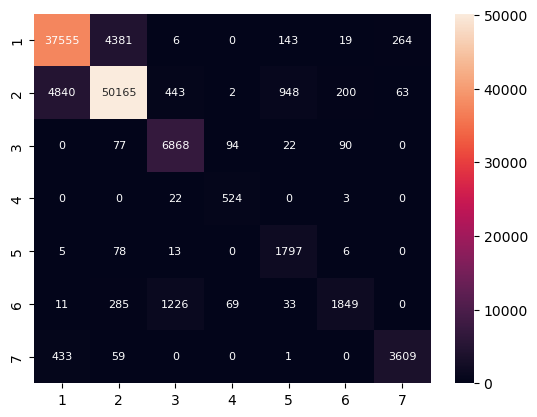

In [84]:
ax = plt.subplot()
cm_heatmap = sns.heatmap(cm2, annot=True, fmt='.0f', annot_kws={"size":8}, ax=ax)
cm_heatmap.set_xticklabels(range(1,8))
cm_heatmap.set_yticklabels(range(1,8))
plt.show()

In [85]:
diff_scores = scores_df-scores_df2
diff_scores

,precision,recall,f1score
1,-0.027851,0.027143,-0.001520
2,0.006379,-0.011101,-0.002700
3,0.053406,-0.064327,0.001282
4,0.096960,-0.296903,-0.102197
5,0.144932,-0.330174,-0.063448
6,-0.095642,0.212784,0.095669
7,0.010732,-0.035836,-0.014145


In [86]:
melted_df = diff_scores.reset_index().melt(id_vars='index', value_vars=['precision', 'recall', 'f1score'])
melted_df.head()

,index,variable,value
0,1,precision,-0.027851
1,2,precision,0.006379
2,3,precision,0.053406
3,4,precision,0.096960
4,5,precision,0.144932


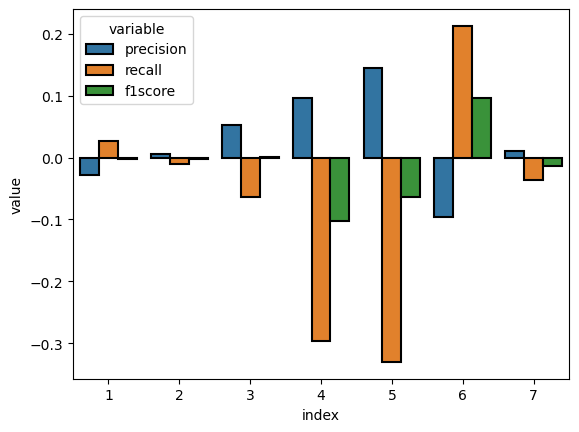

In [87]:
sns.barplot(data=melted_df, x='index', y='value', hue='variable', 
            linewidth=1.5, edgecolor="black")
plt.show()

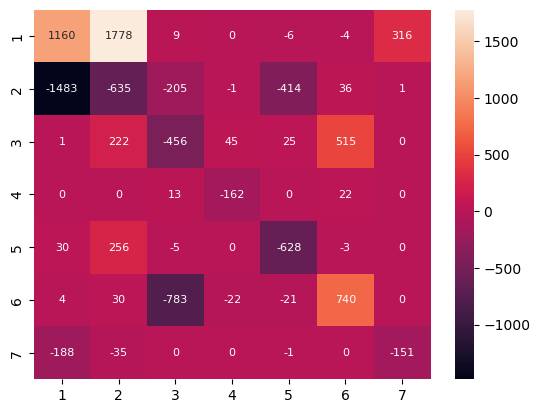

In [88]:
ax = plt.subplot()
cm_heatmap = sns.heatmap(cm-cm2, annot=True, fmt='.0f', annot_kws={"size":8}, ax=ax)
cm_heatmap.set_xticklabels(range(1,8))
cm_heatmap.set_yticklabels(range(1,8))
plt.show()

In [ ]:
#TO DO

#separate pipeline for preprocessing and separate with smote and model - I want to transform X_test
#grid search
#cross validation

Counter({0: 1980, 1: 990})


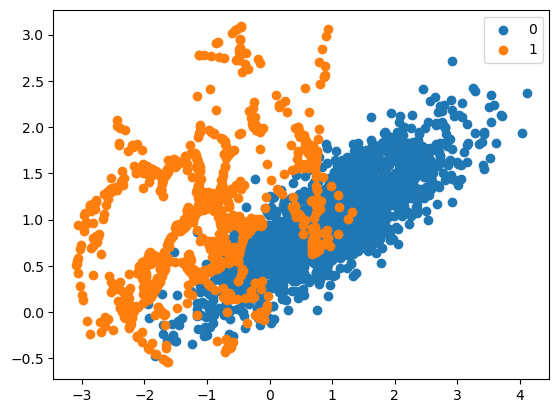

In [97]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

Class=0, n=1980 (66.667%)
Class=1, n=990 (33.333%)


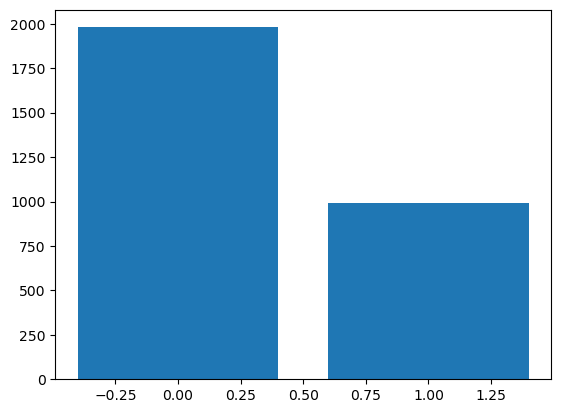

In [98]:
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [100]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [101]:
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
    # define pipeline
    model = DecisionTreeClassifier()
    over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = np.mean(scores)
    print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.817
> k=2, Mean ROC AUC: 0.832
> k=3, Mean ROC AUC: 0.825
> k=4, Mean ROC AUC: 0.840
> k=5, Mean ROC AUC: 0.847
> k=6, Mean ROC AUC: 0.841
> k=7, Mean ROC AUC: 0.839
